# Analiza možnosti za nedeljski izlet
Podatki so zajeti s spletne strani [hribi.net](http://www.hribi.net/goreiskanjerezultat.asp?drzavaid=1&gorovjeid=&goraime=&VisinaMIN=&VisinaMAX=&CasMIN=&CasMAX=&izhodisce=&izhodisceMIN=&izhodisceMAX=&VisinskaRazlikaMIN=&VisinskaRazlikaMAX=&zahtevnostid=&zahtevnostSmucanjeid=&IzhodisceMinOddaljenost=&IzhodisceMAXOddaljenost=&GoraMinOddaljenost=&GoraMaxOddaljenost=&mojaSirina=0&mojaDolzina=0), kjer je trenutno 1704 možnosti za izbiro izleta po Sloveniji (*19. 12. 2018*).
### V spodnji analizi so zbrani naslednji podatki:
* ime izleta,
* nadmorska višina,
* mesto priljubljenosti,
* procent priljubljenosti,
* zahtevnost poti,
* čas hoje,
* število poti,
* vrsta izletniške točke,
* gorovje v katerem se nahaja in
* opis izletniške točke.

## Analiza podatkov
Podatki iz osnovne tabele so predstavljeni v popravljeni tabeli. Ta namesto mešanega stolpca 'Čas poti', vsebuje stolpec 'Čas poti v minutah'. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)
pd.options.display.max_rows = 20

In [2]:
izleti = pd.read_csv('../Prog1_projekt_izlet/Prog1_projekt_izlet/podatki_izlet/podatki_izletov.csv', index_col = 'id')
izleti.columns = ['Ime', 'Gorovje', 'Nadmorska višina v metrih', 'Vrsta', 'Priljubljenost v %', 
                  'Mesto priljubljenosti', 'Št. poti', 'Opis', 'Čas poti', 'Zahtevnost poti']
izleti = izleti[['Ime', 'Nadmorska višina v metrih', 'Mesto priljubljenosti', 'Priljubljenost v %', 
                 'Zahtevnost poti', 'Čas poti', 'Št. poti', 'Vrsta', 'Gorovje', 'Opis']]

Sprememba enot v stolpcu 'Čas poti'. Uporabili smo naslednjo funkcijo:

In [3]:
def v_minute(x):
    if x < 9 :
        x = 60*x
    return x

In [4]:
izleti['Čas poti v min'] = izleti['Čas poti'].apply(v_minute)
izleti = izleti.drop(columns = 'Čas poti')

Oglejmo si razpredelnico izletov s katero bomo nadaljevali:

In [5]:
izleti = izleti[['Ime', 'Nadmorska višina v metrih', 'Mesto priljubljenosti', 'Priljubljenost v %', 
                 'Zahtevnost poti', 'Čas poti v min', 'Št. poti', 'Vrsta', 'Gorovje', 'Opis']]
izleti

,Ime,Nadmorska višina v metrih,Mesto priljubljenosti,Priljubljenost v %,Zahtevnost poti,Čas poti v min,Št. poti,Vrsta,Gorovje,Opis
id,,,,,,,,,,
1950,Ahac,799,1382,46,lahka označena pot,40,5,"vrh, cerkev","Goriško, Notranjsko in Snežniško hribovje","Ahac oz. sv. Ahac je 799 m visok vrh, ki se na..."
2566,Ajdovščina,804,2054,19,lahka neoznačena steza,40,1,vrh,"Goriško, Notranjsko in Snežniško hribovje","Ajdovščina je 804 metre visok vrh, ki se nahaj..."
891,Ankaran,18,547,78,lahka označena pot,180,3,NaN,"Goriško, Notranjsko in Snežniško hribovje","Ankaran je naselje ob slovenski obali, ki se n..."
2594,Baba (pri Javornikih),1085,2081,18,lahka neoznačena steza,60,2,vrh,"Goriško, Notranjsko in Snežniško hribovje","Baba je 1085 metrov visok vrh, ki se nahaja me..."
1740,Bela stena,1122,1236,51,lahka označena pot,120,1,vrh,"Goriško, Notranjsko in Snežniško hribovje",Bela stena (tudi samo Stene) je razgledna točk...
1227,Bele ovce,1029,1204,53,lahka neoznačena steza,30,1,vrh,"Goriško, Notranjsko in Snežniško hribovje","Bele ovce so neporaščen vrh, ki se nahaja vzho..."
1144,Bele stene,863,1310,49,lahka označena pot,60,2,NaN,"Goriško, Notranjsko in Snežniško hribovje",Bele stene se nahajajo severno od vasi Jurišče...
2135,Belovka,848,1579,38,lahka neoznačena steza,15,2,vrh,"Goriško, Notranjsko in Snežniško hribovje","Belovka je 848 metrov visok hrib, ki se nahaja..."
2556,Bezgarska planina,895,2257,11,lahka označena pot,45,4,planina,"Goriško, Notranjsko in Snežniško hribovje",Bezgarska planina se nahaja zahodno od Borovšk...


* Povprečni izlet ima naslednje lastnosti:

In [6]:
povprecni_izlet = izleti.mean()
povprecni_izlet

Nadmorska višina v metrih    1197.588615
Mesto priljubljenosti        1041.220070
Priljubljenost v %             59.075704
Čas poti v min                 94.024061
Št. poti                        3.225352
dtype: float64

In [7]:
priljubljeni = izleti['Priljubljenost v %'] >= 80
priljubljeni_izleti = izleti[priljubljeni]

### Lastnosti gorovij

* V katerem gorovju je največ možnosti za izlet?

In [8]:
gorovje = izleti.groupby('Gorovje')
izleti_v_gorovju = gorovje.size().sort_values(ascending=False)
izleti_v_gorovju

Gorovje
Julijske Alpe                                    462
Goriško, Notranjsko in Snežniško hribovje        263
Kamniško Savinjske Alpe                          257
Karavanke                                        255
Zasavsko - Posavsko hribovje in Dolenjska        181
Škofjeloško, Cerkljansko hribovje in Jelovica    116
Pohorje in ostala severovzhodna Slovenija         92
Polhograjsko hribovje in Ljubljana                78
dtype: int64

Text(0, 0.5, '')

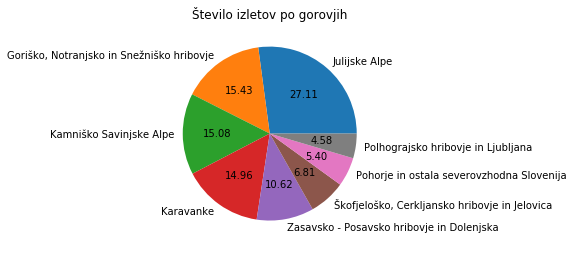

In [9]:
izleti_v_gorovju.plot.pie(autopct = '%.2f', title = 'Število izletov po gorovjih').set_ylabel('')

Po pričakovanjih je največ izletov v Julijskih Alpah, predstavljajo nekaj več kot četrtino vseh možnosti za izlete, saj so najbolj razgibane in imajo več vrhov. Najmanj možnosti pa ponuja Polhograjsko hribovje in Ljubljana. Presenetljivo je tudi, da dobrih 15 % predstavljajo izleti Goriškega, Notranjskega in Snežniškega hribovja, čeprav so nižji od kar nekaj skupin hribovij. To se vidi v naslednji tabeli.

* Izleti v različnih gorovjih pa imajo v povprečju naslednje lastnosti:

In [10]:
gorovje.mean().sort_values('Nadmorska višina v metrih', ascending = False)

,Nadmorska višina v metrih,Mesto priljubljenosti,Priljubljenost v %,Čas poti v min,Št. poti
Gorovje,,,,,
Julijske Alpe,1638.835498,832.134199,67.296537,143.140693,2.831169
Kamniško Savinjske Alpe,1430.891051,829.622568,67.392996,102.182879,4.171206
Karavanke,1335.329412,1150.521569,54.800000,84.019608,3.333333
"Škofjeloško, Cerkljansko hribovje in Jelovica",995.508621,1259.250000,50.508621,61.146552,3.913793
Pohorje in ostala severovzhodna Slovenija,844.445652,1268.608696,50.119565,75.239130,2.369565
"Goriško, Notranjsko in Snežniško hribovje",783.376426,1229.536122,51.646388,67.053232,2.893536
Zasavsko - Posavsko hribovje in Dolenjska,695.348066,1194.353591,53.077348,61.712707,2.895028
Polhograjsko hribovje in Ljubljana,644.192308,1036.743590,59.230769,45.897436,3.961538


Latnosti zgornje preglednice in njenih gorovij si bomo podrobneje ogledali v nadaljevanju s pomočjo grafov.

* Kakšen je povprečen procent priljubljenosti po gorovjih?

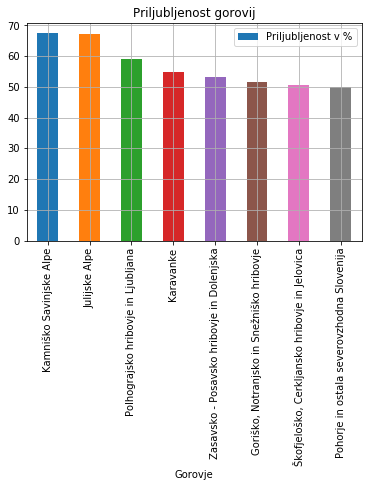

In [11]:
gorovje.mean().sort_values('Priljubljenost v %', ascending = False).plot.bar(y = 'Priljubljenost v %',
                                                                             title = 'Priljubljenost gorovij',
                                                                             grid = True)

Rezultat nas morda preseneti. Pričakovali smo, da bodo Julijske Alpe najbolj priljubljene, prav tako je presenetljivo zadnje mesto priljubljenosti Pohorja. Je pa povprečen procent priljubljenosti kar visok, pri vseh gorovjih je višji od 50%, kar nam daje upanje, da Slovenija ponuja dobre izlete ni važno kam se odpravimo.

* Koliko so v povprečju dolge poti v posameznem gorovju?

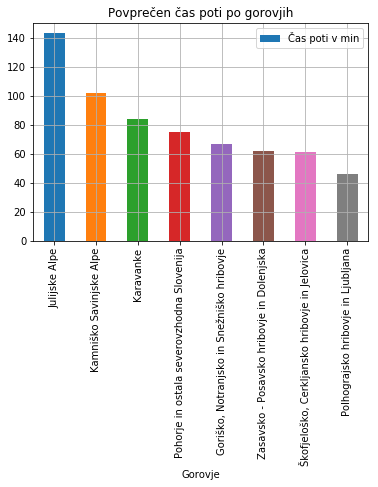

In [12]:
gorovje.mean().sort_values('Čas poti v min', ascending = False).plot.bar(y = 'Čas poti v min',
                                                                         title = 'Povprečen čas poti po gorovjih',
                                                                         grid = True)

Po pričakovanjih je povprečje časov poti izletov v Julijskih Alpah največje, saj so tudi najvišje. Možnosti za daljše izlete najdemo tudi v Kamniško Savinjskih Alpah in Karavankah. Za krajše izlete pa se odpravimo v hribovja, kjer je povprečen čas poti pod 80 minutami.

* Kako se spreminja delež gorovij po procentih priljubljenosti?

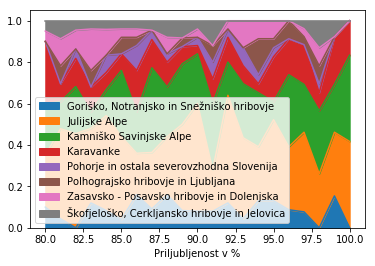

In [13]:
gorovja_priljubljenost = priljubljeni_izleti.groupby(['Priljubljenost v %', 'Gorovje']).size().unstack()
delez_gorovij = gorovja_priljubljenost.apply(lambda st: st/st.sum(), axis = 1)
delez_gorovij.plot.area().legend(loc = 'lower left')

Zgornji graf je zelo razgiban. Vidimo, da v bližini 100% ni izletov v Zasavskem in Polhograjskem hribovju ter Pohorju. V Julijskih alpah je kar 40% vseh izletov najbolj priljubljenih in so dosegli 100% priljubljenost, prav tako je delež visok v Kamniško Savinjskih Alpah. Za izbiro kvalitetnega izleta nam anjveč možnosti ponujajo Julijske in Kamniško Savinjske Alpe. Med nižje ležečimi pa tudi Goriško, Notranjsko in Snežniško hribovje ter Polhograjsko hribovje.

### IZLETI

#### Kako se spreminja višina med 50 najbolj priljubljenimi izleti?

V naslednjem grafu si bomo pogledali kako se višina spreminja med najbolj priljubljenimi izleti. Izleti so padajoče razvrščeni po priljubljenosti.

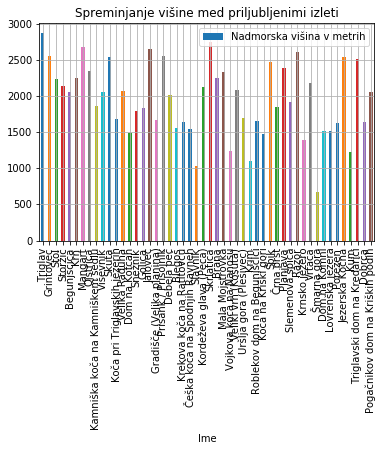

In [14]:
priljubljeni_izleti.sort_values('Mesto priljubljenosti').head(50).plot.bar(x = 'Ime', y = 'Nadmorska višina v metrih', 
                                                                           title = 'Spreminjanje višine med priljubljenimi izleti',
                                                                           grid=True)

Iz zgornjega grafa razberemo, da so višje ležeči izleti bolj priljubljeni. Med prvimi 30 najbolj priljubljenimi izleti je večina višja od 2000 metrov, medtem ko se izleti nižji od 500 metrov sploh ne pojavijo med 50 priljubljenimi. Rezultat je morda presenetljiv, saj bi si mislili, da so bolj priljubljeni tisti izleti, ki so nižji in lažje dostopni.

#### Kako se spreminja čas poti z višino?

Poglejmo si ali obstaja povezava med časom poti in nadmorsko višino. Pričakujemo, da povezava obstaja in da bo čas poti naraščal z nadmorsko višino.

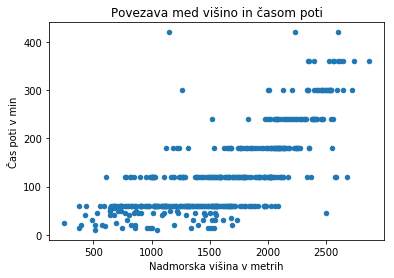

In [15]:
priljubljeni_izleti.sort_values('Nadmorska višina v metrih').plot.scatter('Nadmorska višina v metrih', 'Čas poti v min', 
                                                                           title = 'Povezava med višino in časom poti')

Pričakovano je bilo, da se bo z nadmorsko višino daljšal tudi čas poti. Iz grafa vidimo, da to načeloma drži, vendar obstajajo tudi izjeme. Velika dolžina poti pri nižje ležečih izletih se pojavi zaradi tega, ker je pot dolga, ne pa strma. V visokih predelih pa so poti, do katerih se lahko dostopa z avtom in nato hodi manj časa.

#### Ali obstaja povezava med priljubljenostjo izleta in časom poti?

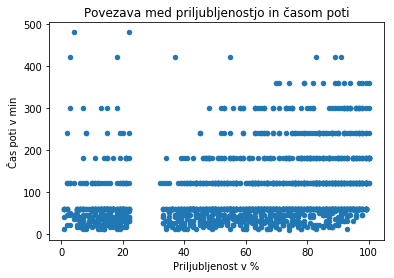

In [16]:
izleti.plot.scatter('Priljubljenost v %', 'Čas poti v min', title = 'Povezava med priljubljenostjo in časom poti')

Naša domneva je bila, da bo med priljubljenostjo in časom poti neka povezava. Iz zgornjega vidimo da ni očitne povezave. Se pa opazi, da je manj ekstremov med 90% in 100% priljubljenostjo. Še posebaj blizu 100% ni zelo dolgih poti in zelo kratkih, kar je kot po pričakovanjih.

Zgornji grafi niso bili preveč zgovorni, nismo opazili konkretne povezave. Zato si bomo pogledali splošnejši primer in po odstotkih naredili povprečja podatkov, ki nas zanimajo.

Ogledali si bomo kako se različni parametri spreminjajo s procentom priljubljenosti. Zato smo naredili naslednjo preglednico, kjer smo združili izlete z enakim procentom priljubljenosti in izračunali povprečno nadmorsko višino, mesto priljubljenosti, čas poti in število poti.

In [17]:
po_procentih1 = izleti.groupby('Priljubljenost v %').mean()
po_procentih = po_procentih1.drop(columns = 'Mesto priljubljenosti')
po_procentih

,Nadmorska višina v metrih,Čas poti v min,Št. poti
Priljubljenost v %,,,
1,693.333333,48.666667,1.500000
2,1207.111111,87.222222,2.777778
3,523.000000,153.571429,1.285714
4,930.833333,128.333333,1.166667
5,613.461538,46.153846,1.923077
6,609.727273,49.545455,1.636364
7,889.500000,70.000000,1.562500
8,1136.500000,93.500000,2.300000
9,561.000000,36.500000,2.200000


* Kako se nadmorska višina spreminja s priljubljenostjo?

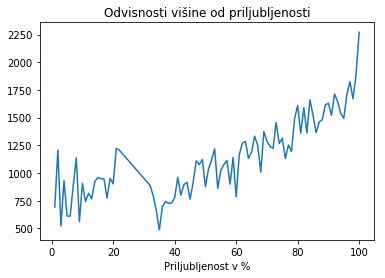

In [18]:
po_procentih['Nadmorska višina v metrih'].plot( title = 'Odvisnosti višine od priljubljenosti')

Pred sabo imamo razgiban graf. Vrednosti zelo skačejo. Iz grafa vseeno preberemo, da med manj priljubljenimi ni pravila o tem ali bo izlet visok ali nizek, medtem ko priljubljenost narašča z nadmorsko višino izleta. Nad 80% priljubljenosti se povprečna višina izletov ne spusti pod 1250 metrov.

* Ali je povezava med časom poti in priljubljenostjo?

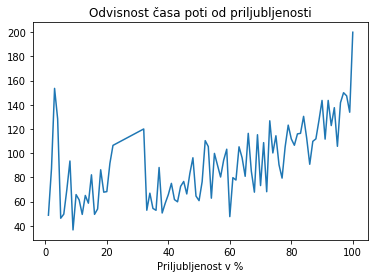

In [19]:
po_procentih['Čas poti v min'].plot(title = 'Odvisnost časa poti od priljubljenosti')

Če primerjamo s prejšnjim grafom, opazimo, da so manj priljubljeni - torej nižji izleti, tudi dolgi. Verjetno iz tega sledi nizek odstotek priljubljenosti. Čas poti počasi narašča s priljubljenostjo, vendar je to posledica visoke nadmorske višine, ki je z naraščanjem priljubljenosti tudi višja. Zato ta graf pred nami ni tako zgovoren. Poglejmo si, kako se povezujeta čas poti in nadmorska višina. Pričakujemo, da bo čas daljši čim bo izlet višji.

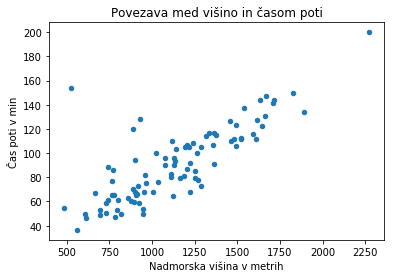

In [20]:
po_procentih.plot.scatter('Nadmorska višina v metrih', 'Čas poti v min', title = 'Povezava med višino in časom poti')

Kljub temu, da smo si graf, ki prikazuje zgornjo povezavo že ogledali, nam zdajšnji pove več, ker smo opazovali zgolj povprečja glede na odstotek priljubljenosti. Iz danega grafa vidimo, da so bila naša pričakovanja pravilna in da je odvisnost linearna. Je pa nekaj izjem, verjetno izleti z nizkim odstotkom priljubljenosti, ki imajo nizko nadmorsko višino in visok čas poti.

### Konkretni izleti

#### *IZLETI GLEDE NA ZAHTEVNOST POTI*
Oglejmo si možnosti za izlete pri konkretnih predpostavkah kot so zahtevnost in dolžina poti. S tem namenom bomo definirali težavnost poti.

In [21]:
zahtevnost = izleti.groupby('Zahtevnost poti')
zahtevnost_poti = zahtevnost.size().sort_values(ascending=False)
zahtevnost_poti

Zahtevnost poti
lahka označena pot                1047
lahka neoznačena steza             325
delno zahtevna označena pot         72
lahko brezpotje                     69
zahtevna označena pot               43
zelo zahtevna označena pot          35
delno zahtevna neoznačena pot       33
zahtevno brezpotje                  27
zahtevna neoznačena steza           24
zelo zahtevno brezpotje             12
izjemno zahtevna označena pot        7
zelo zahtevna neoznačena steza       5
alpinistični vzpon                   3
ni podatka                           2
dtype: int64

In [22]:
l1 = izleti['Zahtevnost poti'] == 'lahka označena pot'
l2 = izleti['Zahtevnost poti'] == 'lahka neoznačena steza'
l3 = izleti['Zahtevnost poti'] == 'lahko brezpotje'
lahka = l1 | l2 | l3

In [23]:
d1 = izleti['Zahtevnost poti'] == 'delno zahtevna označena pot'
d2 = izleti['Zahtevnost poti'] == 'delno zahtevna neoznačena pot'
delno = d1 | d2

In [24]:
z1 = izleti['Zahtevnost poti'] == 'zahtevna označena pot'
z2 = izleti['Zahtevnost poti'] == 'zahtevno brezpotje'
z3 = izleti['Zahtevnost poti'] == 'zahtevna neoznačena steza'
zahtevna = z1 |z2 | z3

In [25]:
e1 = izleti['Zahtevnost poti'] == 'zelo zahtevna označena pot'
e2 = izleti['Zahtevnost poti'] == 'zelo zahtevno brezpotje'
e3 = izleti['Zahtevnost poti'] == 'izjemno zahtevna neoznačena pot'
e4 = izleti['Zahtevnost poti'] == 'zelo zahtevna neoznačena steza'
e5 = izleti['Zahtevnost poti'] == 'alpinistični vzpon'
ekstremna = e1 | e2 | e3 | e4 | e5

#### VRSTE IZLETOV
Za nadaljevaje bomo v našo prvotno tabelo izletov dodali stolpec, ki bo povedal kakšne vrste je izlet.

In [55]:
izleti['Vrsta izleta'] = 'nedefiniran'

#### *SPREHOD*
Sprehod bo izlet, ki ima lahko pot in je precej kratek. Kratek izlet je dolg manj kot 60 minut. Poglejmo si kakšne so možnosti, če se želimo odpraviti na sprehod.

In [156]:
pogoj_sd = lahka & (izleti['Čas poti v min'] < 60)
sprehod = izleti[pogoj_sd]
#sprehod.sort_values('Mesto priljubljenosti')

#### *DRUŽINSKI IZLET*
Za družinski izlet si želimo izlet, ki bo dostopen po lahki poti in ne predolg, da se lahko vrnemo do kosila. V nadaljevanju si bomo pobližje ogledali slednje.

In [158]:
pogoj_dr = lahka & (izleti['Čas poti v min'] >= 60) & (izleti['Čas poti v min'] <= 120)
druzinski = izleti[pogoj_dr]

#### *ŠPORTNI IZLET*
Za športni izlet si bomo ogledali tak izlet, ki je malce daljši, pa tudi pot je zahtevnejša.

In [160]:
sportni1 = l1|l2|l3|d1|d2
cas1 = izleti['Čas poti v min'] > 120
cas2 = izleti['Čas poti v min'] < 300
pogoj_st = sportni1 & cas1 & cas2
sportni = izleti[pogoj_st]
#sportni.sort_values('Mesto priljubljenosti')

#### *ZAHTEVNI IZLETI*
Poglejmo si kakšne so možnosti za zahtevne izlete, kjer je pot zahtevna, časovne omejitve pa nimamo.

In [162]:
pogoj_z = zahtevna
zahtevni = izleti[pogoj_z]

#### *EKSTREMNI IZLETI*
Predvidevamo, da bo velika večina ekstremnih izletov v Julijskih alpah, drugod pa zelo malo in sploh nič.

In [164]:
pogoj_e = ekstremna
ekstremni = izleti[pogoj_e]

In [38]:
# ideja je taka da naredim nov stolpec in za vsak izlet v vrstici pogledam v katero skupino pađe.. 
# na koncu naredim graf iz tega kolk je kkšnih.

In [152]:
def vrsta_izletov(tabela):
    for i in range(0, len(tabela)):
        izlet = tabela[i:i+1]
        if izlet['Ime'].isin(sprehod['Ime']).bool() == True:
            izlet = izlet.replace('nedefiniran', 'sprehod')
            tabela[i:i+1] = izlet
        elif izlet['Ime'].isin(druzinski['Ime']).bool() == True:
            izlet = izlet.replace('nedefiniran', 'družinski')
            tabela[i:i+1] = izlet
        elif izlet['Ime'].isin(sportni['Ime']).bool() == True:
            izlet = izlet.replace('nedefiniran', 'športni')
            tabela[i:i+1] = izlet
        elif izlet['Ime'].isin(zahtevni['Ime']).bool() == True:
            izlet = izlet.replace('nedefiniran', 'zahteven')
            tabela[i:i+1] = izlet
        elif izlet['Ime'].isin(ekstremni['Ime']).bool() == True:
            izlet = izlet.replace('nedefiniran', 'ekstremen')
            tabela[i:i+1] = izlet
        else:
            tabela[i:i+1] = izlet
    return tabela

In [166]:
izleti_vrsta = vrsta_izletov(izleti)

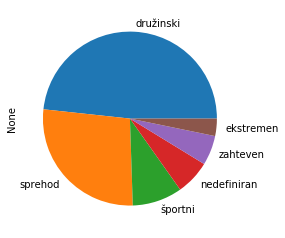

In [171]:
izleti_vrsta.groupby('Vrsta izleta').size().sort_values(ascending=False).plot.pie()

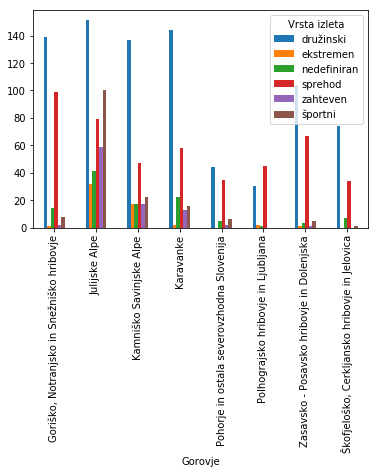

In [191]:
izleti_vrsta.groupby(['Gorovje', 'Vrsta izleta']).size().unstack().plot.bar()

Največ možnosti za izlet "sprehod" je v Goriškem, Notranjske in Snežniškem hribovju, za "družinski" izlet pa največ v Julijskih Alpah. Tudi za ostale vrste izletov prevladujejo Julijske Alpe. To smo tudi pričakovali, saj od prej že vemo, da je tam največ možnosti za izlet. 